In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
model = tf.keras.models.load_model('/content/drive/MyDrive/tensorflow/Car number plate detection /object_detection.h5')

In [6]:
path = '/content/drive/MyDrive/tensorflow/Car number plate detection /test images/iddssu.png'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 

In [7]:
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 336
Width of the image = 602


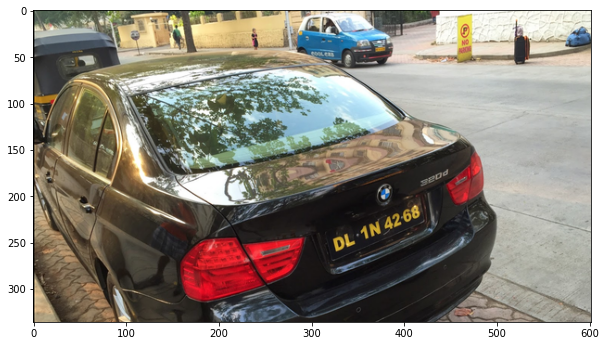

In [9]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [10]:
image_arr_224.shape

(224, 224, 3)

In [ ]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

In [12]:
coords = model.predict(test_arr)
coords

array([[0.48929694, 0.7673463 , 0.6441755 , 0.7828726 ]], dtype=float32)

In [13]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[294.55675966, 461.94248617, 216.44297791, 263.04519939]])

In [14]:
coords = coords.astype(np.int32)
coords

array([[294, 461, 216, 263]], dtype=int32)

(294, 216) (461, 263)


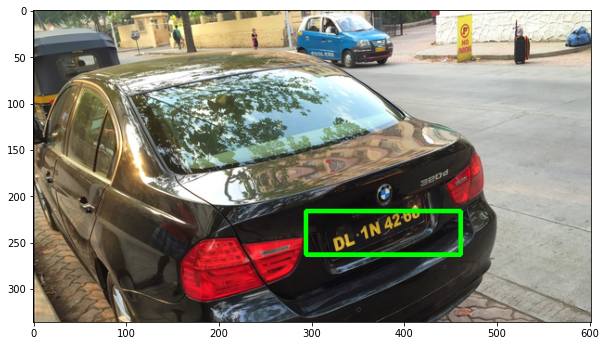

In [15]:
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [16]:
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

(356, 403) (703, 530)


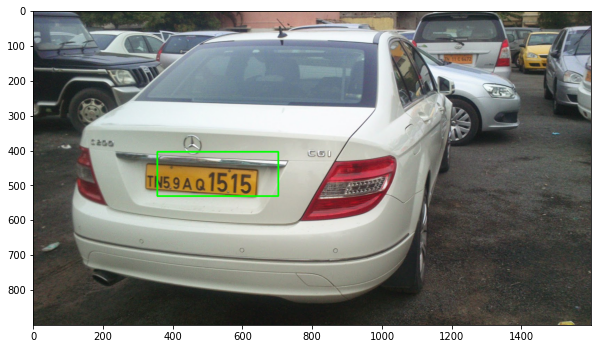

In [18]:
path = '/content/drive/MyDrive/tensorflow/Car number plate detection /test images/iu.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [21]:
!pip install  pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=b694bbab0144d2099bf107b33e2433651370cd2f92b3806d4e0ef969436e2a66
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [27]:
!pip install tesseract-ocr

  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-bfiwo_1z/tesseract-ocr_95dbdc1382ff47a3ac8c309b0d5ee40a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-bfiwo_1z/tesseract-ocr_95dbdc1382ff47a3ac8c309b0d5ee40a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-dkzneme8/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/tesseract-ocr Check the logs for full command output.


In [22]:
import pytesseract as pt

(356, 403) (703, 530)


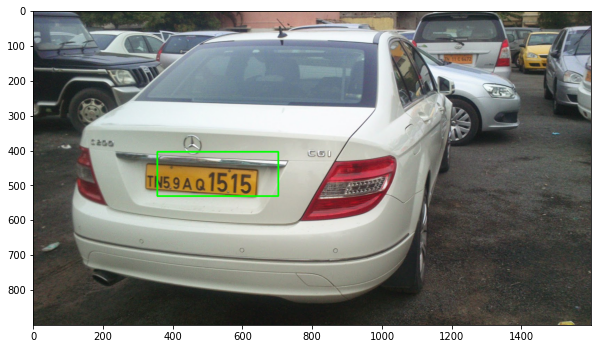

In [23]:

image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [24]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

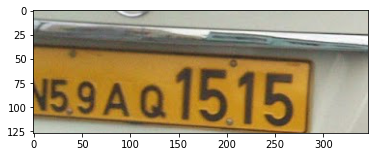

In [25]:
plt.imshow(roi)
plt.show()

In [26]:
text = pt.image_to_string(roi)
print(text)

TesseractNotFoundError: ignored